# Explore here

In [35]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# load the .env file variables
load_dotenv()
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spotify = spotipy.Spotify(auth_manager=auth_manager)

url_artista = "https://open.spotify.com/intl-es/artist/3fMbdgg4jU18AjLCKBhRSm"

In [36]:
top_tracks = spotify.artist_top_tracks("3fMbdgg4jU18AjLCKBhRSm")
for track in top_tracks['tracks'][:10]:
    print('track    : ' + track['name'])

track    : Billie Jean
track    : Beat It
track    : Chicago
track    : Smooth Criminal - 2012 Remaster
track    : Thriller
track    : Rock with You - Single Version
track    : The Way You Make Me Feel - 2012 Remaster
track    : Don't Stop 'Til You Get Enough
track    : They Don't Care About Us
track    : Remember the Time


In [37]:
df_tracks = pd.json_normalize(top_tracks['tracks'])
df_musica = pd.DataFrame(df_tracks)
df_limpio = df_tracks[[
    'name',
    'popularity',
    'duration_ms',
    'album.name'
]].rename(columns={
    'album.name': 'album'
})
print(df_limpio)


                                       name  popularity  duration_ms  \
0                               Billie Jean          85       294226   
1                                   Beat It          81       258399   
2                                   Chicago          82       245506   
3           Smooth Criminal - 2012 Remaster          77       257760   
4                                  Thriller          75       357800   
5            Rock with You - Single Version          80       220626   
6  The Way You Make Me Feel - 2012 Remaster          77       298120   
7            Don't Stop 'Til You Get Enough          78       365466   
8                  They Don't Care About Us          77       284160   
9                         Remember the Time          77       239226   

                                         album  
0                                     Thriller  
1                                     Thriller  
2                                       XSCAPE  
3          

In [38]:
df_limpio_ordenado = df_limpio.sort_values(by='popularity', ascending=True)

top_3_menos_popular = df_limpio_ordenado.head(3)

print(top_3_menos_popular)


                                       name  popularity  duration_ms  \
4                                  Thriller          75       357800   
3           Smooth Criminal - 2012 Remaster          77       257760   
6  The Way You Make Me Feel - 2012 Remaster          77       298120   

              album  
4          Thriller  
3  Bad (Remastered)  
6  Bad (Remastered)  


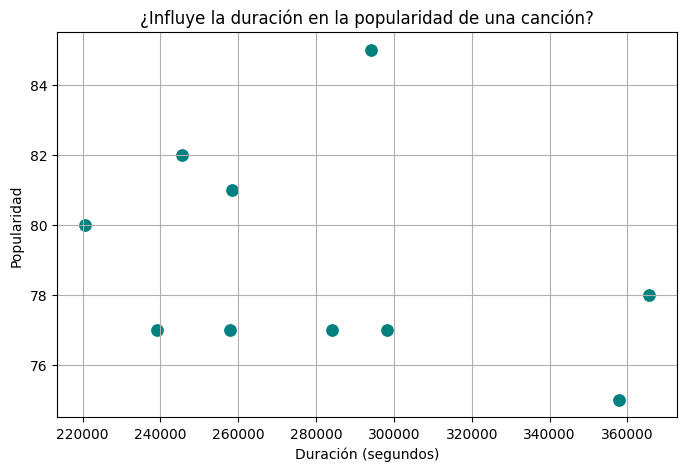

In [39]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_limpio, x='duration_ms', y='popularity', s=100, color='teal')

plt.xlabel('Duración (segundos)')
plt.ylabel('Popularidad')
plt.title('¿Influye la duración en la popularidad de una canción?')
plt.grid(True)
plt.show()


## No podemos decir que entre mas corta la cancion mas popular ya que como podemos observar en el grafico no hay una relacion directa, ya que no podemos apreciar una inclinacion de popularidad decreciente hacia las canciones con mas duracion 